In [1]:
# CMPT 353 - Exercise 2
# Arsalan Macknojia

In [2]:
import re
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# To suppress chained assignment false positive warnings
pd.options.mode.chained_assignment = None

In [3]:
# Get data from dog_rates_tweets.csv as DataFrame
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [4]:
# Parsing tweets to extract ratings.
tweets = data['text']
ratings = tweets.str.extract(r'(\d+(\.\d+)?)/10', expand=False)
ratings = pd.to_numeric(ratings[0])

# Add ratings column to DF
data['ratings'] = ratings

# Current DataFrame
data

,id,created_at,text,ratings
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off,NaN
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back,NaN
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️,NaN
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...,NaN
...,...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...,NaN
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...,NaN
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...,NaN
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...,NaN


In [5]:
# Data cleanup

# Exclude tweets that don't contain a rating
data.dropna()

# Remove outliers: Excluding rating values that are too large to make sense.
data = data[ratings <= 25.0]

# Current DataFrame
data

,id,created_at,text,ratings
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


<function matplotlib.pyplot.show(*args, **kw)>

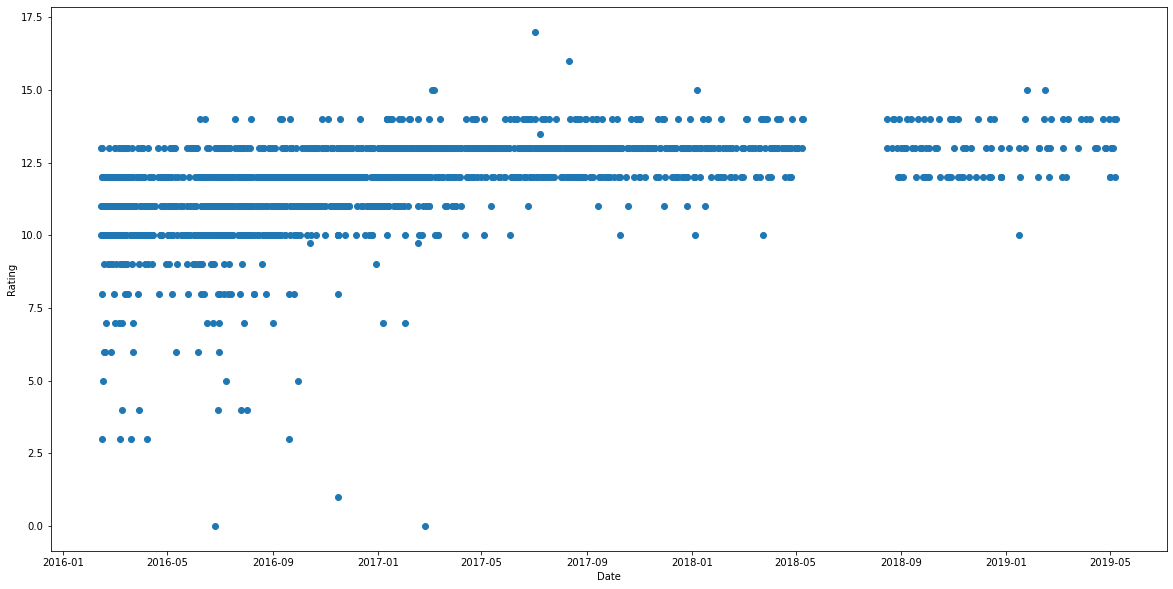

In [6]:
# Scatter plot of date vs rating
plt.figure(figsize=(20,10))
plt.scatter(data['created_at'].values, data['ratings'])
plt.xlabel("Date")
plt.ylabel("Rating")
plt.show

In [7]:
# Helper function to return time expressed as the number of seconds that have passed since January 1, 1970.
def to_timestamp(date):
    return date.timestamp()

# Convert date in 'created_at' to seconds.
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [8]:
# Calculate a linear least-squares regression for timestamp and ratings.
fit = stats.linregress(data['timestamp'], data['ratings'] )
data['prediction'] = (fit.slope)*data['timestamp'] + fit.intercept

# Current DataFrame
data

,id,created_at,text,ratings,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [9]:
# Gradient and y-intercept of the best-fit line. 
fit.slope, fit.intercept

(3.5159299748477226e-08, -40.46415480898918)

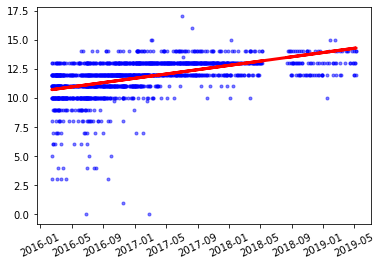

In [10]:
# Scatter plot of date vs rating along with a best fit line.
plt.xticks(rotation=25)
plt.plot(data['created_at'].values, data['ratings'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()